# Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

heart_disease_data = pd.read_csv('heart.csv')
heart_disease_data.columns =['age', 'sex', 'chest_pain', 'restbps', 'chol', 'fbs', 'restecg', 'max_heart_rate',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'actual_disease']
print(heart_disease_data.columns)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Index(['age', 'sex', 'chest_pain', 'restbps', 'chol', 'fbs', 'restecg',
       'max_heart_rate', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'actual_disease'],
      dtype='object')


# Exploring the data.

In [2]:
heart_disease_data.head()

,age,sex,chest_pain,restbps,chol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,actual_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease_data.dtypes

age                 int64
sex                 int64
chest_pain          int64
restbps             int64
chol                int64
fbs                 int64
restecg             int64
max_heart_rate      int64
exang               int64
oldpeak           float64
slope               int64
ca                  int64
thal                int64
actual_disease      int64
dtype: object

As we can see there are 14 features which all are integers but one is floating number. There is no string datatype which is very conveinient.

In [4]:
heart_disease_data.describe()

,age,sex,chest_pain,restbps,chol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,actual_disease
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.535354,0.680135,0.959596,131.582492,247.063973,0.144781,0.525253,149.542088,0.326599,1.056902,1.393939,0.690236,2.329966,0.542088
std,9.046404,0.467211,1.032439,17.700801,51.913057,0.352474,0.526528,22.934228,0.469761,1.165130,0.617616,0.957724,0.586052,0.499066
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


There is a lot of information above. The dataset consists of people older than 29 and 75% are older than 48. There are more men than women. Also the medical columns say that there is huge posibility of heart diseases. And according to "actual_disease" column more than 50% people in this dataset are ill.

In [5]:
print(heart_disease_data.shape)

(297, 14)


In [6]:
disease_counts = heart_disease_data['actual_disease'].value_counts()
print(disease_counts)

1    161
0    136
Name: actual_disease, dtype: int64


Data is sligtly imbalanced. There are 161 healthy people and 136 with hearth disease.

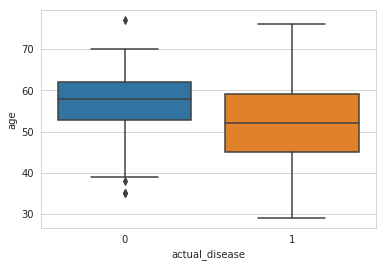

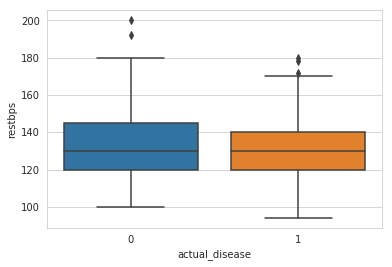

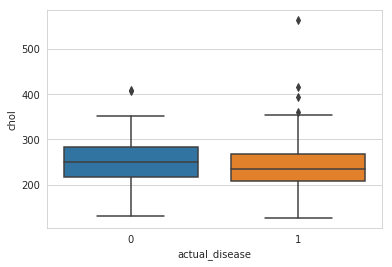

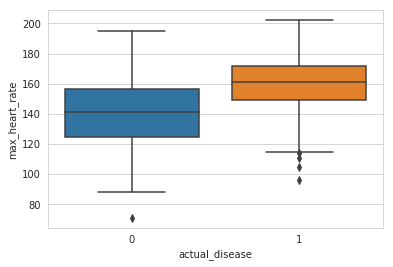

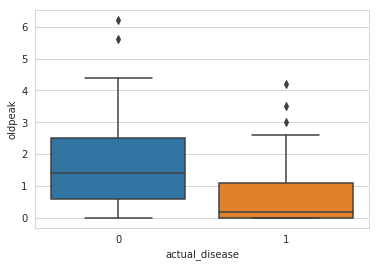

In [7]:
def plot_box(heart_disease_data, cols, col_x = 'actual_disease'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=heart_disease_data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['age', 'restbps', 'chol', 'max_heart_rate', 'oldpeak']
plot_box(heart_disease_data, num_cols)

This box plots are pretty obvious. The worse is health conditions such as high cholesterol the highest probabilty of heart disease.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


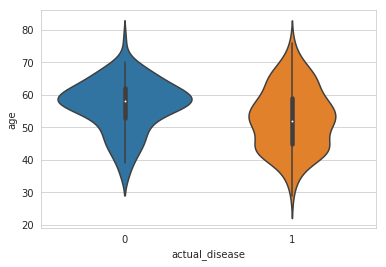

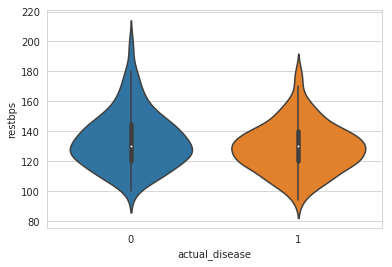

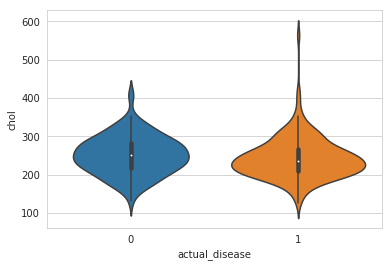

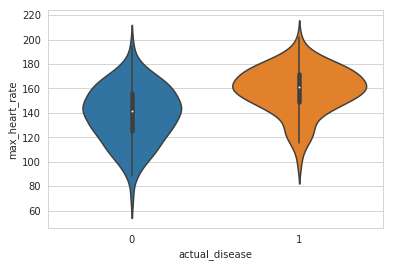

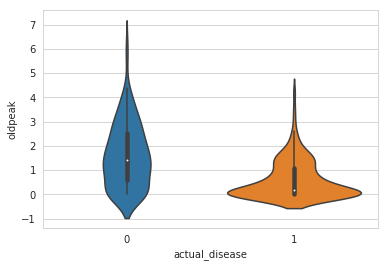

In [8]:
def plot_violin(heart_disease_data, cols, col_x = 'actual_disease'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=heart_disease_data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['age', 'restbps', 'chol', 'max_heart_rate', 'oldpeak']
plot_violin(heart_disease_data, num_cols)

There is one interesting thing. If the oldpeak value is close to zero there is high propability of being healthy.

sex


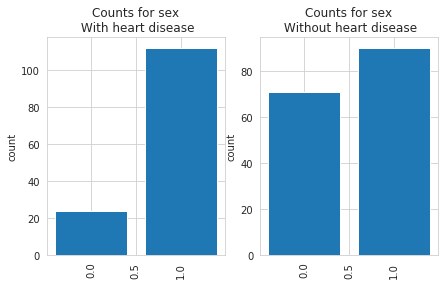

chest_pain


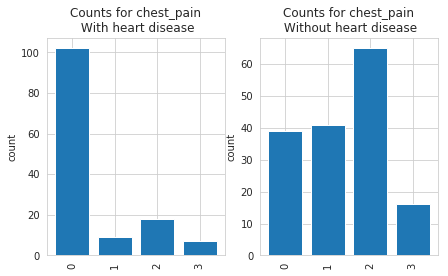

fbs


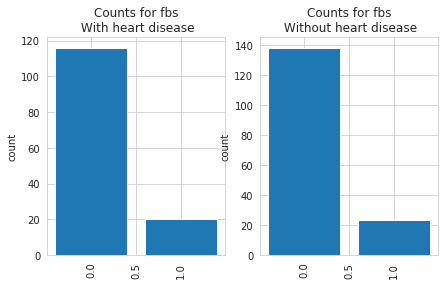

restecg


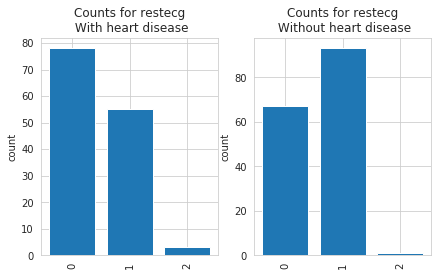

exang


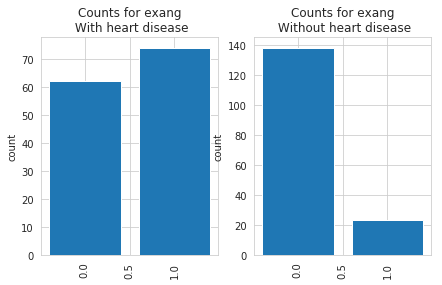

slope


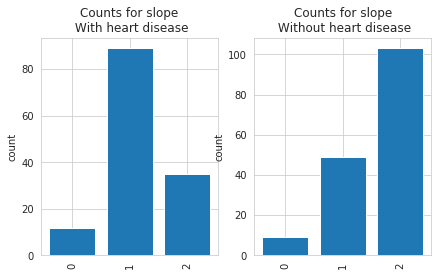

ca


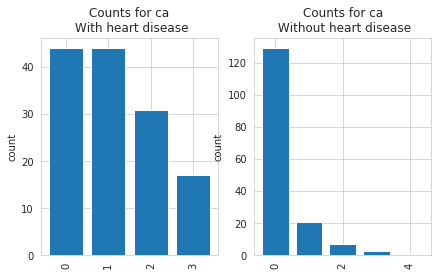

thal


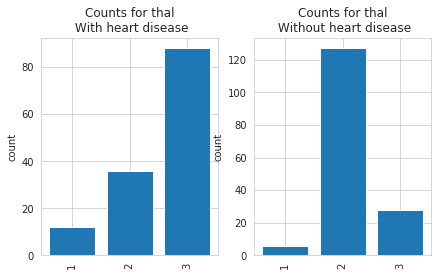

In [9]:
import numpy as np
cat_cols = ['sex', 'chest_pain','fbs', 'restecg', 'exang','slope', 'ca', 'thal']

heart_disease_data['dummy'] = np.ones(shape = heart_disease_data.shape[0])
for col in cat_cols:
    print(col)
    counts = heart_disease_data[['dummy','actual_disease', col]].groupby(['actual_disease', col], as_index = False).count()
    temp = counts[counts['actual_disease'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (7,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['actual_disease'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n With heart disease')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['actual_disease'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Without heart disease')
    plt.ylabel('count')
    plt.show()